In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
m_e=0.510998928*10**(6) # masa del electron en MeV/c^2
v_c=3*10**8 # velocidad de la luz en [m/s]
class Schrodinger:
    
    def __init__(self,a,b,N,V,m):
        hbar=6.582119624 *10**(-16)
        c=3*10**8 # velocidad de la luz en [m/s]
        
        self.x=np.linspace(a,b,N)
        self.m=m
        h = self.x[1]-self.x[0]
        T = np.zeros((N-2)**2).reshape(N-2,N-2)
        self.V_z=V(self.x)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    T[i,j]= -2
                elif np.abs(i-j)==1:
                    T[i,j]=1

        self.T = T
        
        V_i = np.zeros((N-2)**2).reshape(N-2,N-2)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    V_i[i,j]= V(self.x[i])
                    
                    
        self.V_i = V_i
        
        self.H = -0.5*(hbar)**2 / (self.m)*c**(2) *self.T/(h**2) + self.V_i
        
        self.val,self.vec=np.linalg.eig(self.H)
        self.energia=self.val[np.argsort(self.val)][0:4]
        

        

    def Phi(self,n):
        colors=["b","y","r","g"]
        One=np.ones(len(self.x))
        E_1=self.energia[0]*One
        E_2=self.energia[1]*One
        E_3=self.energia[2]*One
        E_4=self.energia[3]*One
        
        plt.plot(self.x,self.V_z,color="black")
        plt.plot(self.x,E_4,color=colors[3],label="$E_4$= {0:.3f} eV".format(E_4[0]))
        plt.plot(self.x,E_3,color=colors[2],label="$E_3$= {0:.3f} eV".format(E_3[0]))
        plt.plot(self.x,E_2,color=colors[1],label="$E_2$= {0:.3f} eV".format(E_2[0]))
        plt.plot(self.x,E_1,color=colors[0],label="$E_1$= {0:.3f} eV".format(E_1[0]))
        
        plt.legend()
        
        plt.title("Potencial V(z)")
        plt.ylabel("V (eV)")
        plt.xlabel("z  (m)")

        phi=[]
        for i in range(n):
            phi.append([])
        for i in range(n):
            phi[i] = np.append(phi[i],self.vec[:,np.argsort(self.val)[0:n][i]])
            phi[i] = np.append(phi[i],0)
            phi[i] = np.insert(phi[i],0,0)

        self.phi = phi
        plt.figure(figsize=(12,14))
        for i in range(n):
            plt.subplot(4,2,2*i+1)
            plt.plot(self.x,self.phi[i],color=colors[i])
            plt.title("Función de onda para n=%3.0f"%(i+1))
            plt.xlabel("z (m)")
            plt.ylabel("$\psi(z)$")
            plt.grid()
            plt.subplot(4,2,2*i+2)
            plt.plot(self.x,abs(self.phi[i])**2,color=colors[i])
            plt.title("Modulo al cuadrado de la función de onda para n=%3.0f"%(i+1))
            plt.xlabel("z (m)")
            plt.ylabel("$|\psi(x)|^{2}$")            
            plt.grid()
        plt.tight_layout()
        plt.show()

In [3]:
def  Vpot(x):
    y=np.piecewise(x, [x < -10**(-10), x >= 10**(-10)],[lambda x:100, lambda x:100])
    return y

def Vpot_inf(x):  # Pozo de potencial infinito
    y=np.piecewise(x, [x < -1*10**(-10), x >= 1*10**(-10)],[lambda x:1000, lambda x:1000])
    return y

def oscilador(x):
    return (1.3**2*10**44)*207*m_e/(v_c**2)* 0.5*(x**2)

In [26]:
a = Schrodinger(-7*10**(-10),7*10**(-10),700,Vpot,m_e)

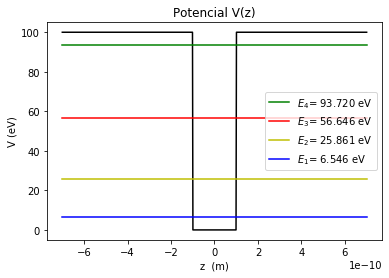

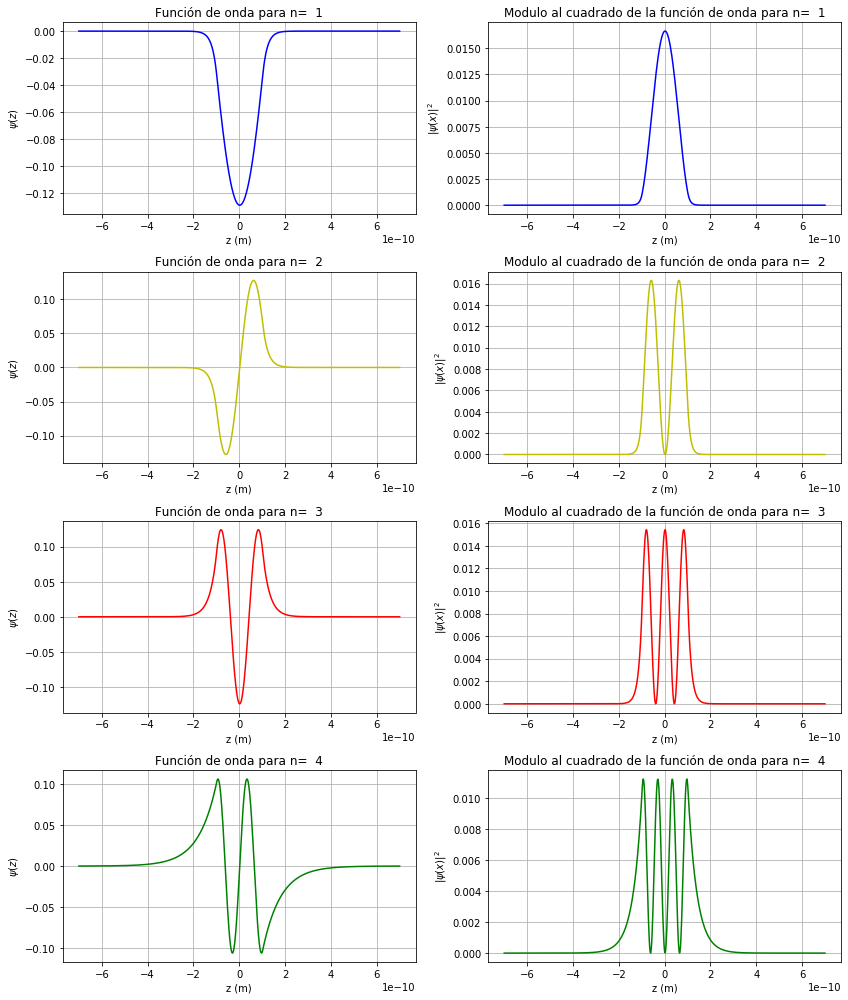

In [27]:
a.Phi(4)

In [63]:
b = Schrodinger(-2*10**(-10),2*10**(-10),400,Vpot_inf,m_e)

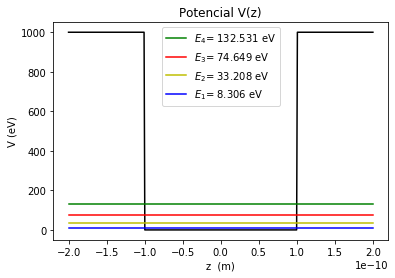

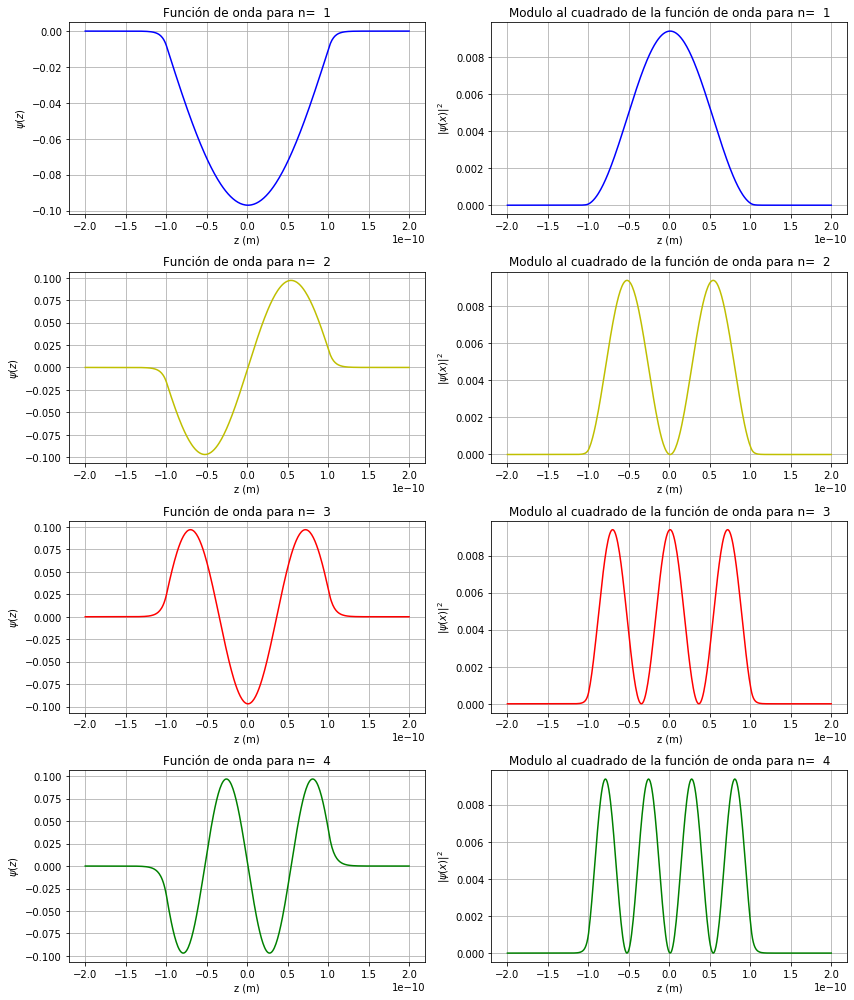

In [64]:
b.Phi(4)

In [4]:
c = Schrodinger(-3.5*10**(-14),3.5*10**(-14),500,oscilador,207*m_e)

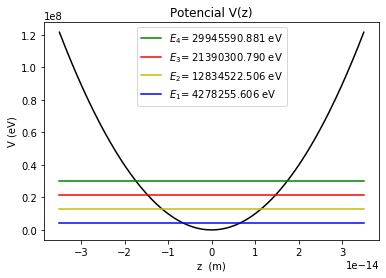

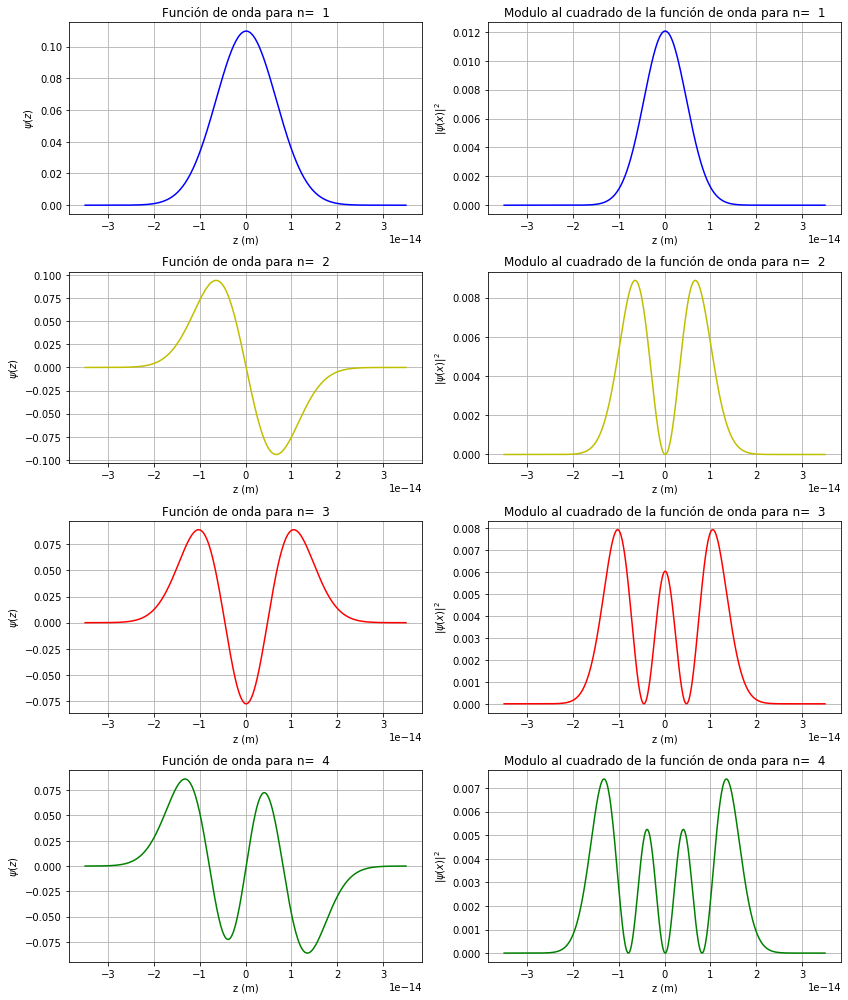

In [5]:
c.Phi(4)

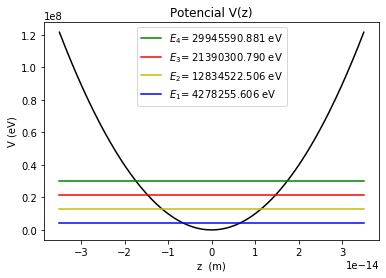

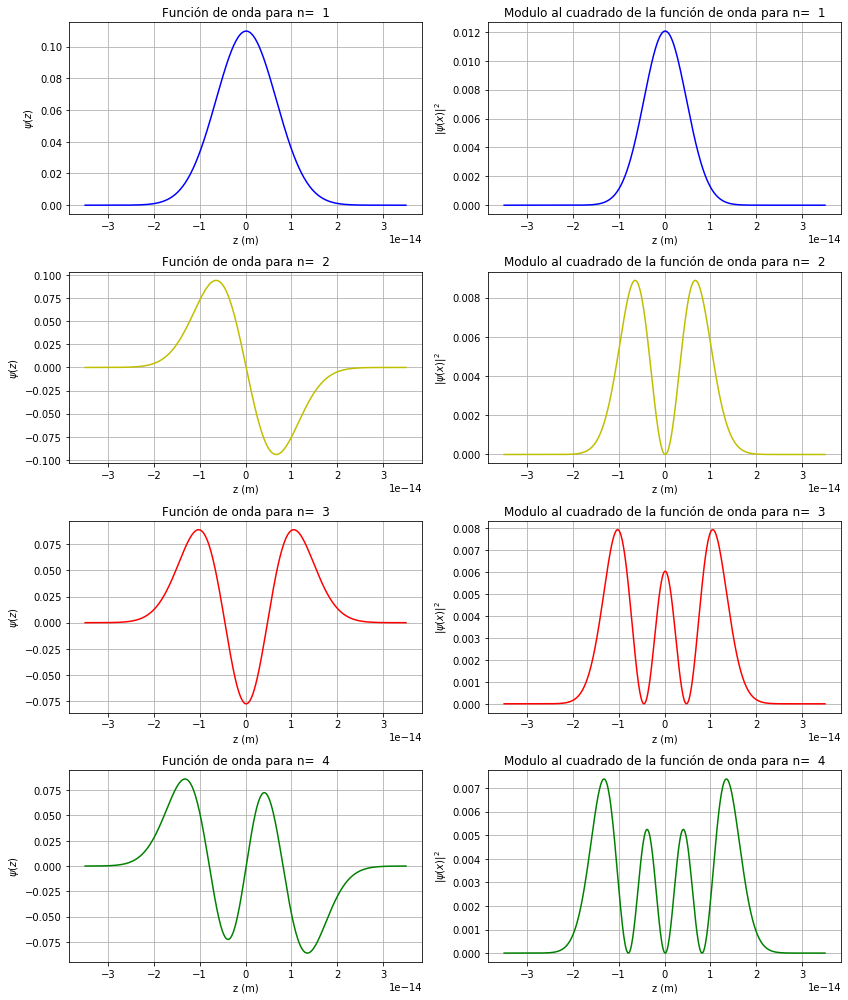

In [8]:
b=c.Phi(4)

In [46]:
K = np.sqrt(simps(abs(c.phi[-1])**2,c.x))

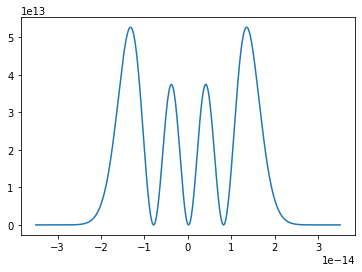

In [48]:
plt.plot(c.x,(c.phi[-1]/K)**2)

In [51]:
simps((c.phi[-1]/K)**2,c.x)

1.0